# BAIS:3250 Data Wrangling Final Project
### Team Members: Brady Hunter, Michael Swaim
### Date: April 27, 2025

---

**Analyzing Trends and Clustering in S&P 500 Stock Data**

---

## Introduction

In this project, we explore historical stock data for S&P 500 companies to uncover trends across sectors, test investment-related hypotheses, and apply unsupervised machine learning for clustering.  
We focus on the following tasks:

- Univariate and bivariate analysis of stock prices and sectors
- Statistical hypothesis testing
- Machine learning using KMeans clustering

---

## Dataset Description

The dataset `cleaned_sp500_data.csv` contains merged information from:

- S&P 500 company listings scraped from Wikipedia
- Historical stock prices from Yahoo Finance

Each record includes company name, sector, stock prices (open, high, low, close), volume, and other key attributes.

---

## Analysis Steps

- Load the pre-cleaned dataset.
- Conduct univariate and bivariate exploratory data analysis (EDA).
- Perform hypothesis testing comparing sector closing prices.
- Implement KMeans clustering on stock features.

---


Dataset loaded: 56158 rows, 11 columns


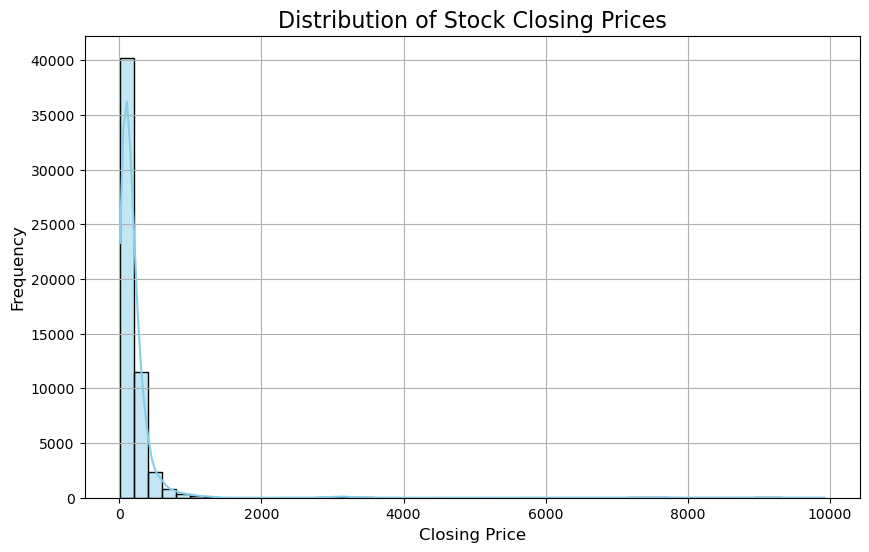

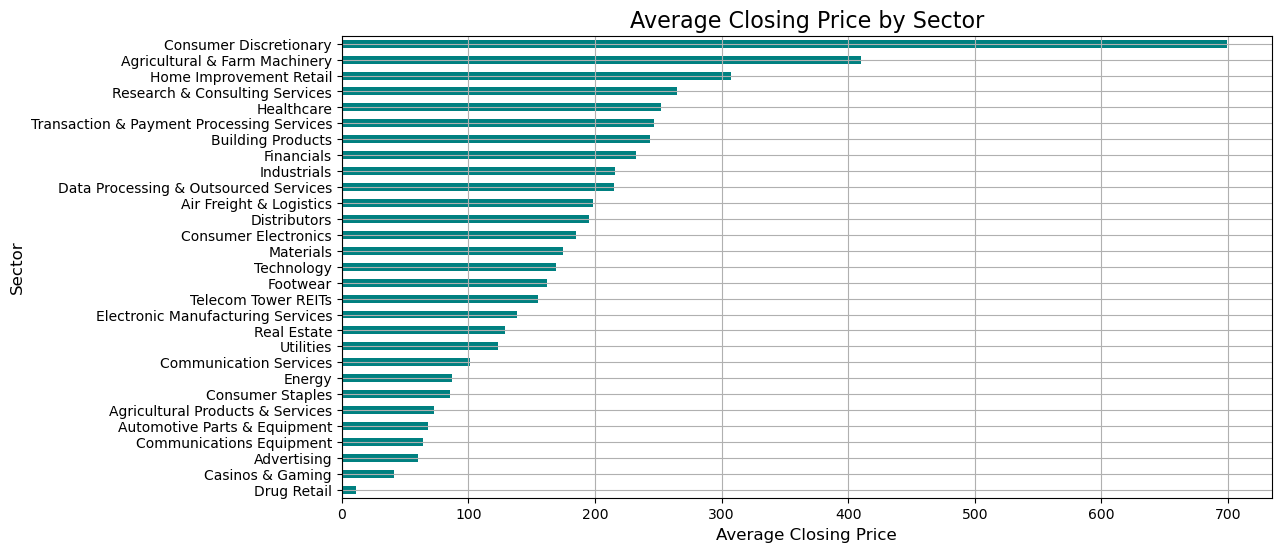


--- Hypothesis Test Results ---
T-statistic: -25.1141
P-value: 0.0000
→ Reject the null hypothesis: Sector mean closing prices are significantly different.


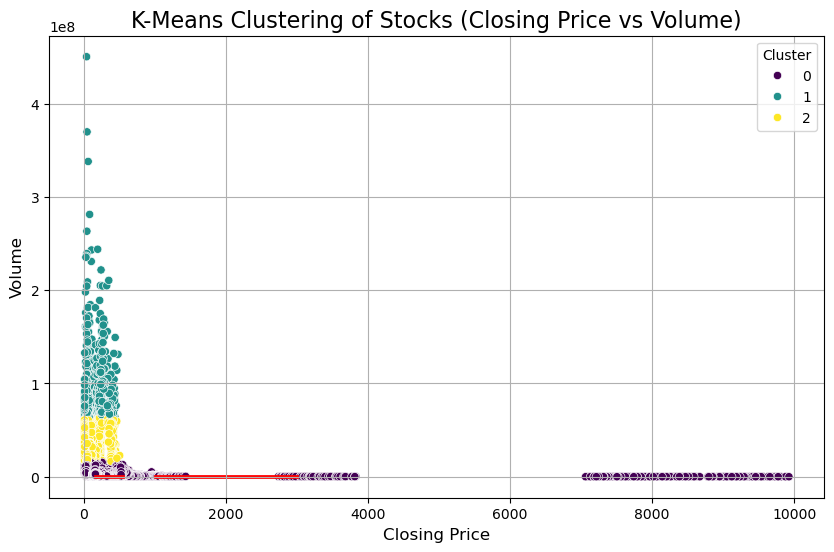

In [16]:
# ------------------------------------------------------------
# BAIS:3250 Data Wrangling Final Project
# Brady Hunter & Michael Swaim
# April 27, 2025
# ------------------------------------------------------------
# Objective: Analyze S&P 500 stock data, test sector hypotheses, and apply KMeans clustering.
# ------------------------------------------------------------

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans

# 2. Load Cleaned Dataset
cleaned_df = pd.read_csv("cleaned_sp500_data.csv")
print(f"Dataset loaded: {cleaned_df.shape[0]} rows, {cleaned_df.shape[1]} columns")

# 3. Univariate Analysis: Distribution of Closing Prices
plt.figure(figsize=(10,6))
sns.histplot(cleaned_df['Close'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Stock Closing Prices', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# 4. Bivariate Analysis: Average Closing Price by Sector
sector_avg = cleaned_df.groupby('Sector')['Close'].mean().sort_values()

plt.figure(figsize=(12,6))
sector_avg.plot(kind='barh', color='teal')
plt.title('Average Closing Price by Sector', fontsize=16)
plt.xlabel('Average Closing Price', fontsize=12)
plt.ylabel('Sector', fontsize=12)
plt.grid(True)
plt.show()

# 5. Hypothesis Test: Technology vs Healthcare Sector Closing Prices
# Null Hypothesis (H0): Mean closing prices are the same across Technology and Healthcare sectors
# Alternative Hypothesis (H1): Mean closing prices differ between Technology and Healthcare sectors

# Extract closing prices for the two sectors
tech_returns = cleaned_df[cleaned_df['Sector'] == 'Technology']['Close']
healthcare_returns = cleaned_df[cleaned_df['Sector'] == 'Healthcare']['Close']

# Perform independent two-sample t-test
t_stat, p_val = ttest_ind(tech_returns, healthcare_returns, nan_policy='omit')

# Display Hypothesis Test Results
print("\n--- Hypothesis Test Results ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("→ Reject the null hypothesis: Sector mean closing prices are significantly different.")
else:
    print("→ Fail to reject the null hypothesis: No significant difference between sector means.")

# 6. Machine Learning: KMeans Clustering (Close Price and Volume)
# Objective: Identify natural groupings of stocks based on price and trading volume

# Select features and drop any missing values
ml_df = cleaned_df[['Close', 'Volume']].dropna()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(ml_df)

# Assign clusters back to the DataFrame
ml_df['Cluster'] = clusters

# Visualize KMeans Clusters with Highlighted Regions
plt.figure(figsize=(10,6))
sns.scatterplot(x='Close', y='Volume', hue='Cluster', palette='viridis', data=ml_df)
plt.title('K-Means Clustering of Stocks (Closing Price vs Volume)', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Volume', fontsize=12)

# Adding boxes to highlight significant clusters
# Example coordinates for the box (x, y, width, height), adjust based on your data analysis
highlight_boxes = [
    (150, 100000, 400, 1000000),  # Example: Cluster 0
    (1000, 50000, 2000, 200000)   # Example: Cluster 1
]

# Draw rectangles on the plot
for box in highlight_boxes:
    plt.gca().add_patch(plt.Rectangle(
        (box[0], box[1]), box[2], box[3], linewidth=2, edgecolor='r', facecolor='none'
    ))

plt.legend(title='Cluster')
plt.grid(True)
plt.show()